In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.text import Annotation
from matplotlib.patches import FancyArrowPatch
import matplotlib.patches as mpatches
from numpy import matlib
#import keras

In [2]:
class Annotation3D(Annotation):
    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0,0), *args, **kwargs)
        self._xyz = xyz
 
    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, renderer.M)
        self.xy=(x2,y2)
        super().draw(renderer)
 
def _annotate3D(ax,text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''
 
    annotation= Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)
 
setattr(Axes3D,'annotate3D',_annotate3D)
 
class Arrow3D(FancyArrowPatch):
    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._xyz = (x,y,z)
        self._dxdydz = (dx,dy,dz)
 
    def draw(self, renderer):
        x1,y1,z1 = self._xyz
        dx,dy,dz = self._dxdydz
        x2,y2,z2 = (x1+dx,y1+dy,z1+dz)
 
        xs, ys, zs = proj_transform((x1,x2),(y1,y2),(z1,z2), renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        super().draw(renderer)
 
def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''
 
    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)
 
setattr(Axes3D,'arrow3D',_arrow3D)

In [3]:
jp_score = np.array([49, 58, 64, 65, 54, 58, 49, 67, 54, 66, 72, 66, 54, 64, 39, 
             56, 54, 56, 48, 57, 57, 47, 50, 60, 72, 54, 59, 61, 64, 70])

math_score = np.array([51, 58, 56, 70, 45, 70, 45, 69, 66, 73, 71, 72, 57, 53, 58, 
             57, 71, 63, 53, 62, 62, 59, 57, 65, 74, 66, 72, 50, 69, 60])

en_score = np.array([59, 63, 68, 77, 55, 71, 57, 79, 66, 81, 81, 77, 62, 67, 56,
             62, 70, 67, 61, 70, 68, 59, 61, 71, 77, 66, 70, 59, 68, 71])




In [4]:
mean_vector = np.array([jp_score.mean(), math_score.mean(), en_score.mean()])
data_matrix = np.c_[jp_score, math_score, en_score]
data_mean_reduced = data_matrix - mean_vector
covariance_matrix = np.dot(data_mean_reduced.T, data_mean_reduced) / len(jp_score)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
sorted_index = eigen_values.argsort()[::-1] 
eigen_values=eigen_values[sorted_index]
eigen_vectors=eigen_vectors[:, sorted_index]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:59: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


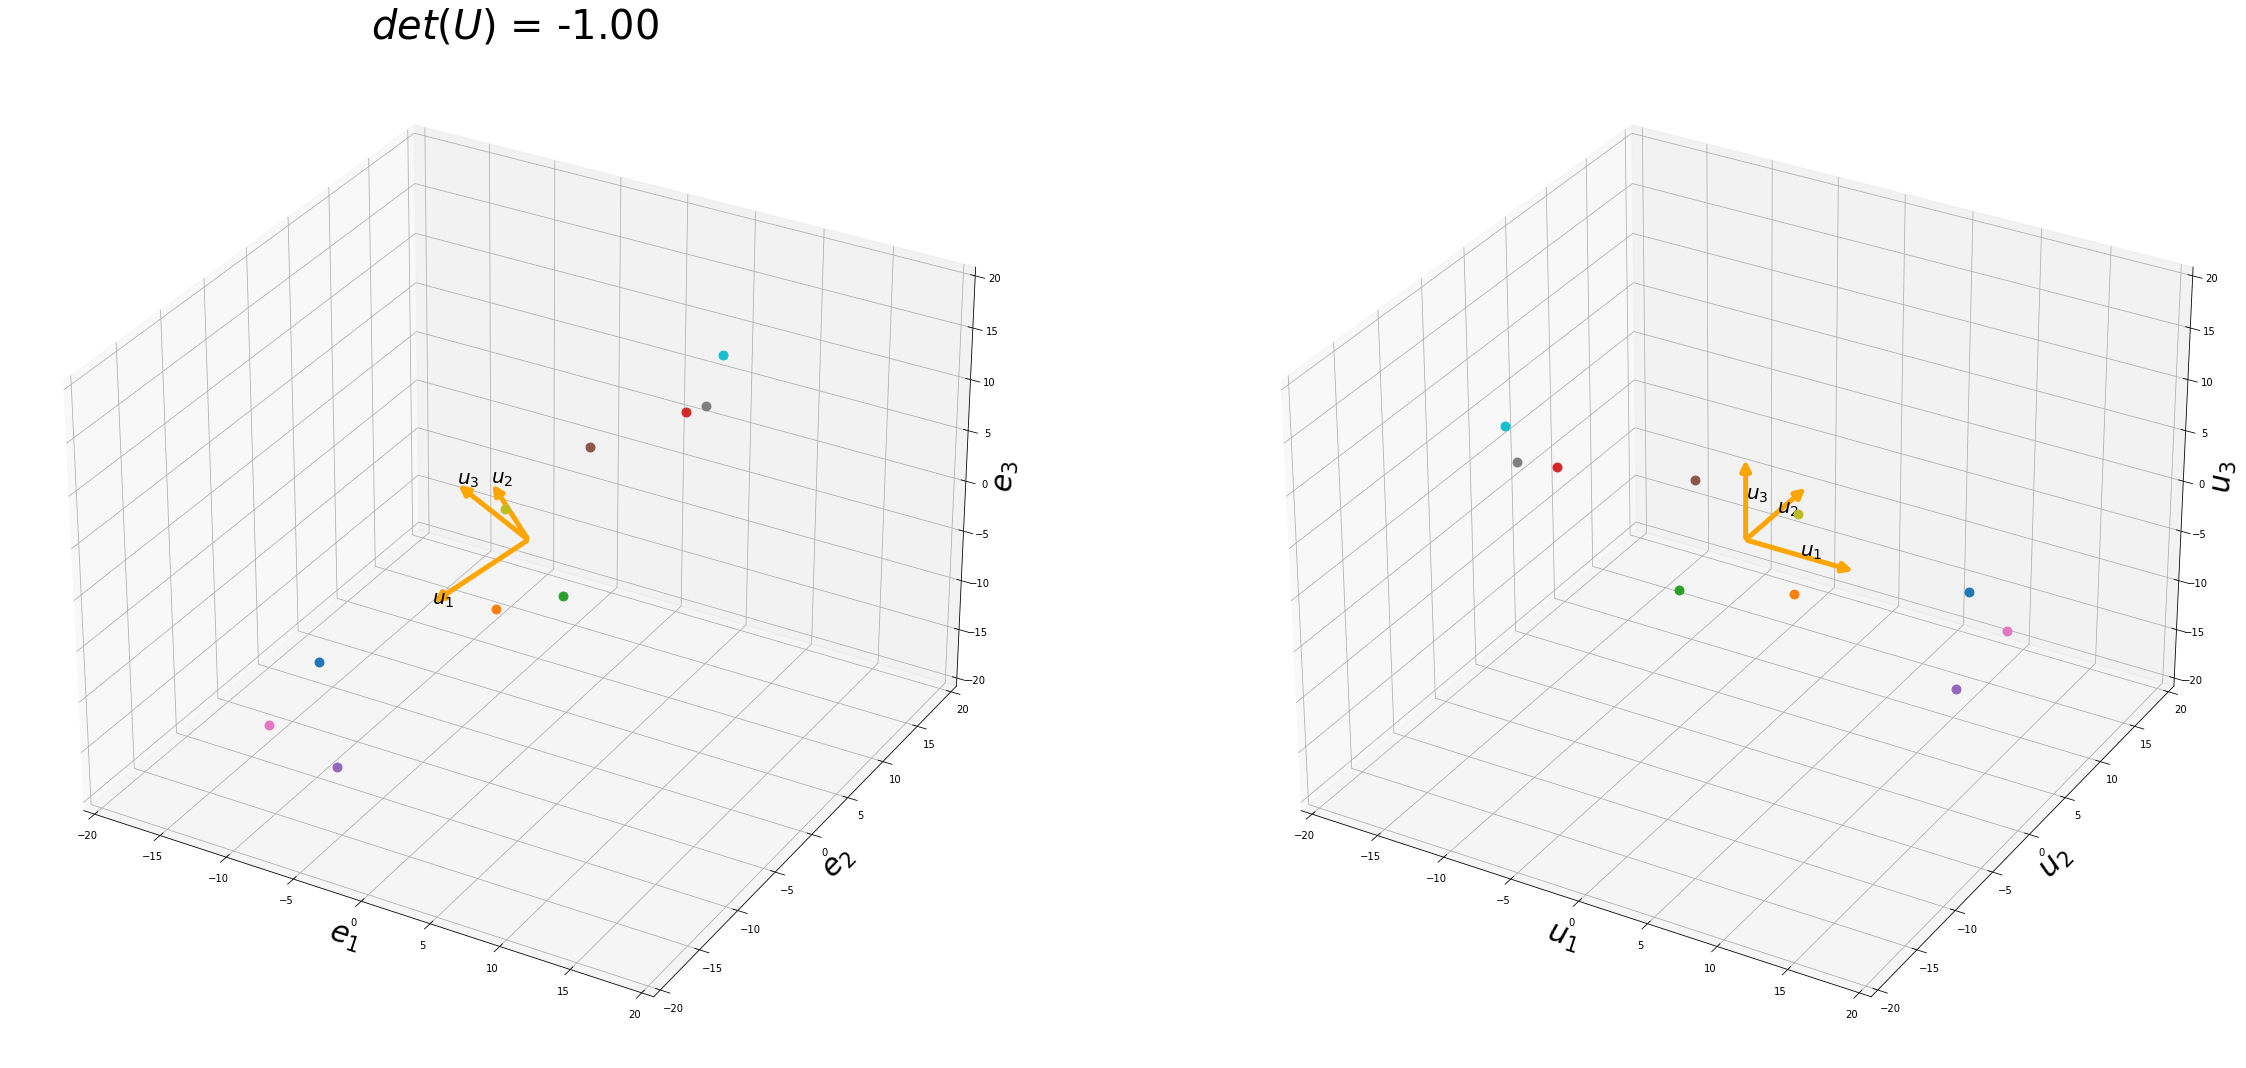

In [5]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
import numpy as np 

fig = plt.figure(figsize=(40, 20)) # Square figure 
ax = fig.add_subplot(121, projection='3d') 

for i in range(10):
    ax.scatter(data_mean_reduced[i, 0], data_mean_reduced[i, 1], data_mean_reduced[i, 2], marker='o', s=80)

axis_length = 8

ax.arrow3D(0, 0, 0, eigen_vectors.T[0][0]*axis_length, eigen_vectors.T[0][1]*axis_length, eigen_vectors.T[0][2]*axis_length,
                       mutation_scale=20,  arrowstyle="-|>", fc='orange', ec='orange', lw = 5)
ax.arrow3D(0, 0, 0, eigen_vectors.T[1][0]*axis_length, eigen_vectors.T[1][1]*axis_length, eigen_vectors.T[1][2]*axis_length,
                       mutation_scale=20, arrowstyle="-|>", fc='orange', ec='orange', lw = 5)
ax.arrow3D(0, 0, 0, eigen_vectors.T[2][0]*axis_length, eigen_vectors.T[2][1]*axis_length, eigen_vectors.T[2][2]*axis_length,
                       mutation_scale=20, arrowstyle="-|>", fc='orange', ec='orange', lw = 5)

ax.set_xlabel(r'$e_1$', fontsize=30)
ax.set_ylabel(r'$e_2$', fontsize=30)
ax.set_zlabel(r'$e_3$', fontsize=30)

ax.text(eigen_vectors.T[0][0]*8 , eigen_vectors.T[0][1]*8, eigen_vectors.T[0][2]*8, r'$u_1$', fontsize=20)
ax.text(eigen_vectors.T[1][0]*8 , eigen_vectors.T[1][1]*8, eigen_vectors.T[1][2]*8, r'$u_2$', fontsize=20)
ax.text(eigen_vectors.T[2][0]*8 , eigen_vectors.T[2][1]*8, eigen_vectors.T[2][2]*8, r'$u_3$', fontsize=20)

grid_range = 20

ax.set_xlim(-grid_range, grid_range)
ax.set_ylim(-grid_range, grid_range)
ax.set_zlim(-grid_range, grid_range)
ax.set_title(r"$det(U)$ = {0:.2f}".format(np.linalg.det(eigen_vectors)), fontsize=40)

data_pca = np.dot(eigen_vectors.T, data_mean_reduced.T ).T

ax = fig.add_subplot(122, projection='3d') 

for i in range(10):
    ax.scatter(data_pca[i, 0], data_pca[i, 1], data_pca[i, 2], marker='o', s=80)

axis_length = 8
ax.arrow3D(0, 0, 0, axis_length, 0, 0, mutation_scale=20,  arrowstyle="-|>", fc='orange', ec='orange', lw = 5)
ax.arrow3D(0, 0, 0, 0, axis_length, 0, mutation_scale=20, arrowstyle="-|>", fc='orange', ec='orange', lw = 5)
ax.arrow3D(0, 0, 0, 0, 0, axis_length, mutation_scale=20, arrowstyle="-|>", fc='orange', ec='orange', lw = 5)

ax.text(4, 0, 0, r'$u_1$', fontsize=20)
ax.text(0, 4, 0, r'$u_2$', fontsize=20)
ax.text(0, 0, 4, r'$u_3$', fontsize=20)
ax.set_xlabel(r'$u_1$', fontsize=30)
ax.set_ylabel(r'$u_2$', fontsize=30)
ax.set_zlabel(r'$u_3$', fontsize=30)

grid_range = 20

ax.set_xlim(-grid_range, grid_range)
ax.set_ylim(-grid_range, grid_range)
ax.set_zlim(-grid_range, grid_range)
fig.show()

In [6]:
eigen_vectors[:, 1] = - eigen_vectors[:, 1]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:59: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


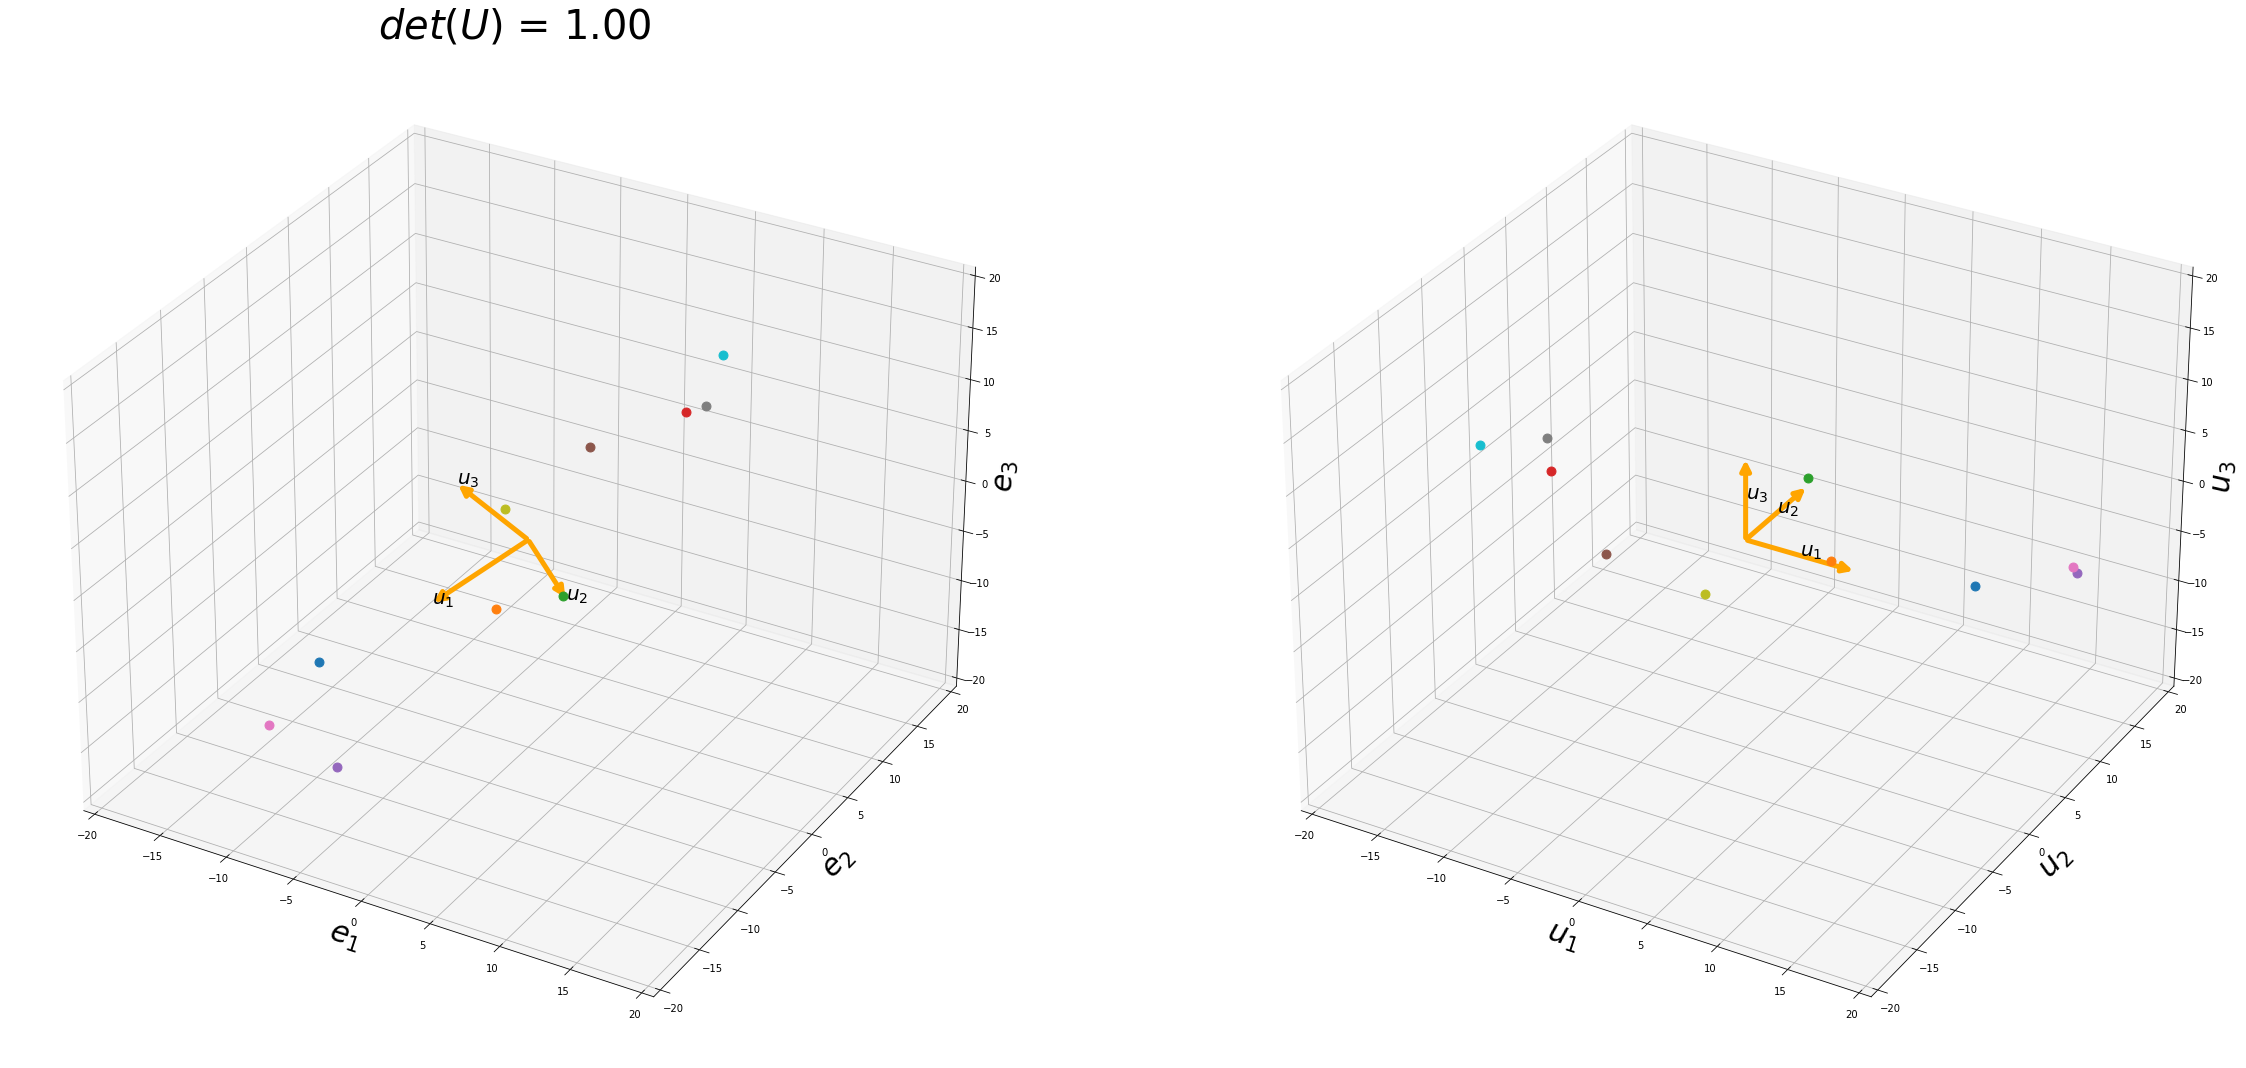

In [7]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
import numpy as np 

fig = plt.figure(figsize=(40, 20)) # Square figure 
ax = fig.add_subplot(121, projection='3d') 

for i in range(10):
    ax.scatter(data_mean_reduced[i, 0], data_mean_reduced[i, 1], data_mean_reduced[i, 2], marker='o', s=80)

axis_length = 8

ax.arrow3D(0, 0, 0, eigen_vectors.T[0][0]*axis_length, eigen_vectors.T[0][1]*axis_length, eigen_vectors.T[0][2]*axis_length,
                       mutation_scale=20,  arrowstyle="-|>", fc='orange', ec='orange', lw = 5)
ax.arrow3D(0, 0, 0, eigen_vectors.T[1][0]*axis_length, eigen_vectors.T[1][1]*axis_length, eigen_vectors.T[1][2]*axis_length,
                       mutation_scale=20, arrowstyle="-|>", fc='orange', ec='orange', lw = 5)
ax.arrow3D(0, 0, 0, eigen_vectors.T[2][0]*axis_length, eigen_vectors.T[2][1]*axis_length, eigen_vectors.T[2][2]*axis_length,
                       mutation_scale=20, arrowstyle="-|>", fc='orange', ec='orange', lw = 5)

ax.set_xlabel(r'$e_1$', fontsize=30)
ax.set_ylabel(r'$e_2$', fontsize=30)
ax.set_zlabel(r'$e_3$', fontsize=30)

ax.text(eigen_vectors.T[0][0]*8 , eigen_vectors.T[0][1]*8, eigen_vectors.T[0][2]*8, r'$u_1$', fontsize=20)
ax.text(eigen_vectors.T[1][0]*8 , eigen_vectors.T[1][1]*8, eigen_vectors.T[1][2]*8, r'$u_2$', fontsize=20)
ax.text(eigen_vectors.T[2][0]*8 , eigen_vectors.T[2][1]*8, eigen_vectors.T[2][2]*8, r'$u_3$', fontsize=20)

grid_range = 20

ax.set_xlim(-grid_range, grid_range)
ax.set_ylim(-grid_range, grid_range)
ax.set_zlim(-grid_range, grid_range)
ax.set_title(r"$det(U)$ = {0:.2f}".format(np.linalg.det(eigen_vectors)), fontsize=40)

data_pca = np.dot(eigen_vectors.T, data_mean_reduced.T ).T

ax = fig.add_subplot(122, projection='3d') 

for i in range(10):
    ax.scatter(data_pca[i, 0], data_pca[i, 1], data_pca[i, 2], marker='o', s=80)

axis_length = 8
ax.arrow3D(0, 0, 0, axis_length, 0, 0, mutation_scale=20,  arrowstyle="-|>", fc='orange', ec='orange', lw = 5)
ax.arrow3D(0, 0, 0, 0, axis_length, 0, mutation_scale=20, arrowstyle="-|>", fc='orange', ec='orange', lw = 5)
ax.arrow3D(0, 0, 0, 0, 0, axis_length, mutation_scale=20, arrowstyle="-|>", fc='orange', ec='orange', lw = 5)

ax.text(4, 0, 0, r'$u_1$', fontsize=20)
ax.text(0, 4, 0, r'$u_2$', fontsize=20)
ax.text(0, 0, 4, r'$u_3$', fontsize=20)
ax.set_xlabel(r'$u_1$', fontsize=30)
ax.set_ylabel(r'$u_2$', fontsize=30)
ax.set_zlabel(r'$u_3$', fontsize=30)

grid_range = 20

ax.set_xlim(-grid_range, grid_range)
ax.set_ylim(-grid_range, grid_range)
ax.set_zlim(-grid_range, grid_range)
fig.show()
